import thư viện

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

tổng quan về dataset

In [3]:
df = pd.read_csv("tips.csv")
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


xử lý dữ liệu bị trùng

In [4]:
df = pd.read_csv("./tips.csv")
dupli = df.duplicated()
print(df[dupli])

     total_bill  tip     sex smoker   day   time  size
202        13.0  2.0  Female    Yes  Thur  Lunch     2


kiểm tra dữ liệu bị trùng

In [5]:
def remove_duplicates(file):
  df = pd.read_csv(file)
  df.drop_duplicates(inplace=True)
  df.to_csv(file.replace(".csv", "_deduplicated.csv"), index=False)
remove_duplicates("tips.csv")
df = pd.read_csv("./tips_deduplicated.csv")
dupli = df.duplicated()
print(df[dupli])

Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []


-> xử lý giá trị trong tập dữ liệu: 
 

In [8]:
df = pd.read_csv("./tips_deduplicated.csv")
print(df.describe())
df.describe(include="all").T.round(2)

       total_bill         tip        size
count  243.000000  243.000000  243.000000
mean    19.813868    3.002387    2.572016
std      8.910071    1.385002    0.952356
min      3.070000    1.000000    1.000000
25%     13.380000    2.000000    2.000000
50%     17.810000    2.920000    2.000000
75%     24.175000    3.575000    3.000000
max     50.810000   10.000000    6.000000


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,243.0,NaN,NaN,NaN,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,NaN,NaN,NaN,3.002387,1.385002,1.0,2.0,2.92,3.575,10.0
sex,243,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,243,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,243,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,243,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,243.0,NaN,NaN,NaN,2.572016,0.952356,1.0,2.0,2.0,3.0,6.0


với các giá trị min, max, trung vị, trung bình trong tập dữ liệu tương đối ổn nên ta sẽ không tiến hành xử lý các giá trị quá chênh lệnh so với tập dữ liệu.

CHUẢN HÓA DỮ LIỆU

phân tích đơn biến

In [ ]:
df = pd.read_csv("tips_deduplicated.csv")
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column)
    plt.title(f"Biểu đồ cột {column}")
    plt.show()
    print("-" * 90)

<Axes: ylabel='total_bill'>

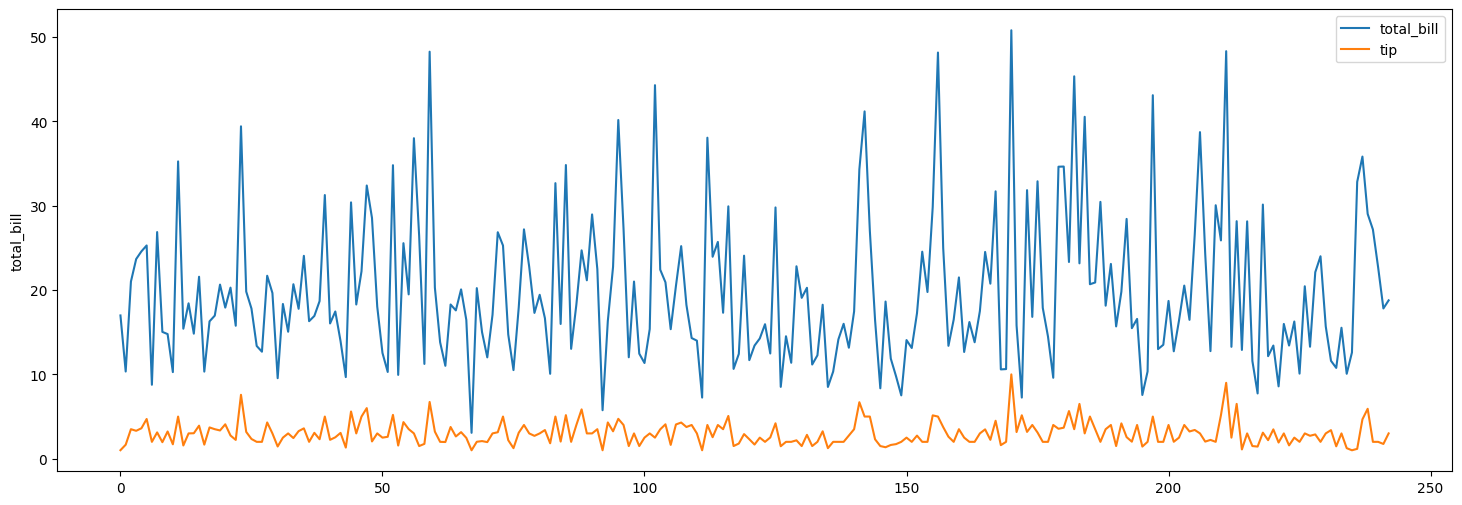

In [16]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df['total_bill'], label="total_bill")
sns.lineplot(data=df['tip'], label="tip")




<Axes: xlabel='total_bill', ylabel='tip'>

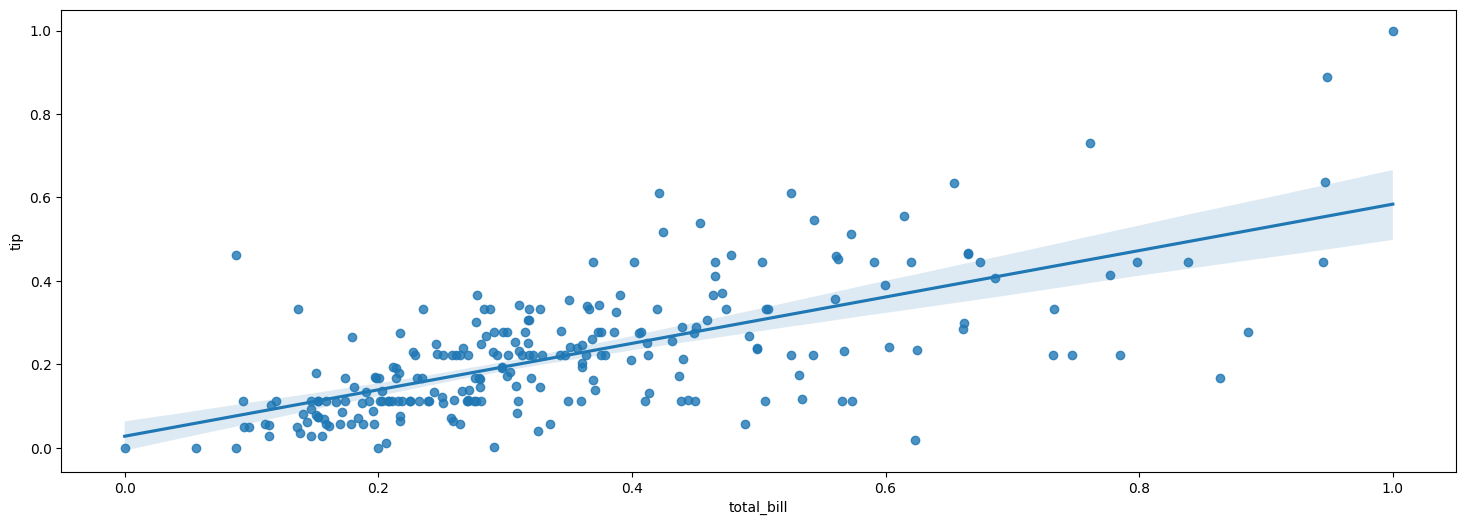

In [27]:
plt.figure(figsize=(18, 6))
sns.regplot(x=df['total_bill'], y=df['tip'])

<Axes: xlabel='sex', ylabel='total_bill'>

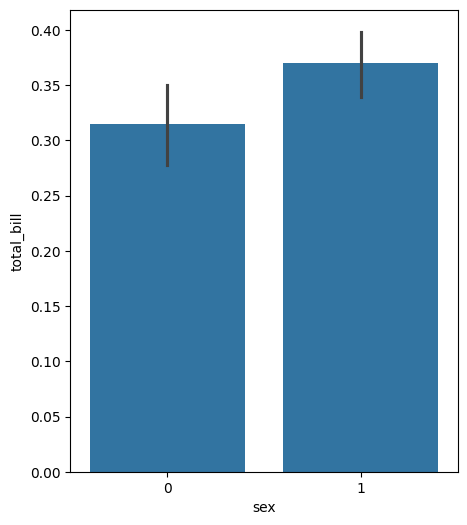

In [29]:
plt.figure(figsize=(5,6))
sns.barplot(x=df['sex'], y=df['total_bill'])

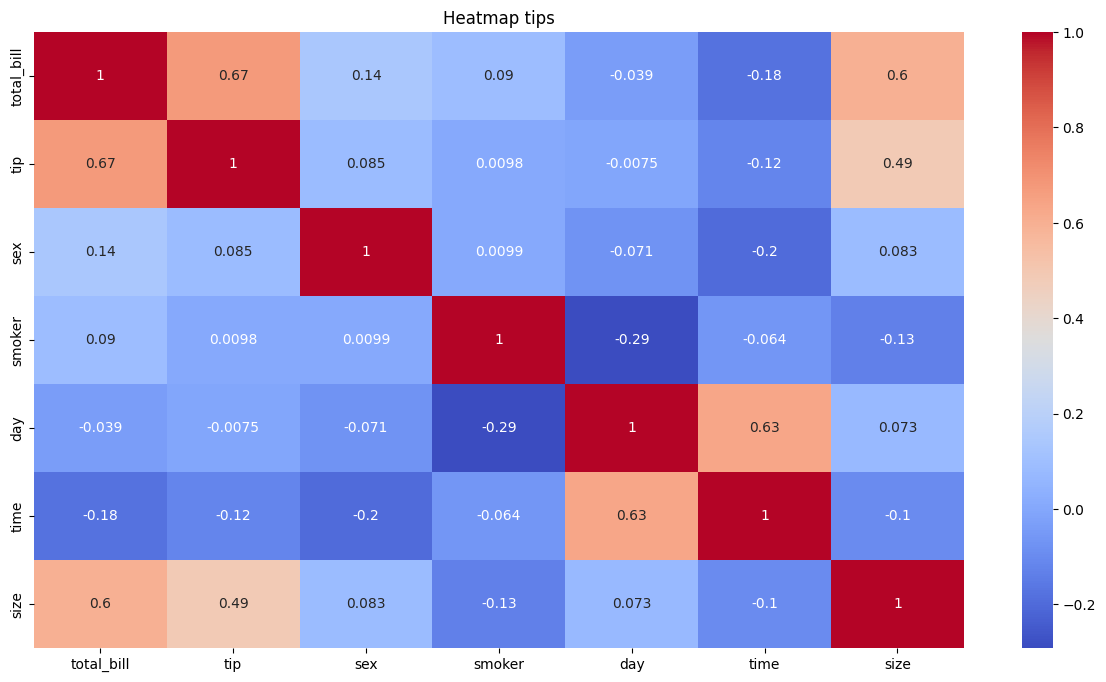

In [30]:
df = pd.read_csv("./tips_deduplicated_minmax.csv")
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes

plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap tips")
plt.show()

chuẩn hóa dữ liệu

In [31]:
data = pd.read_csv("./tips_deduplicated.csv")

data = data.drop(["sex", "smoker", "day", "time", "size"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data.drop("tip", axis=1), data["tip"], test_size=0.2, random_state=42)

model = rf1 = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.9358217687074828


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


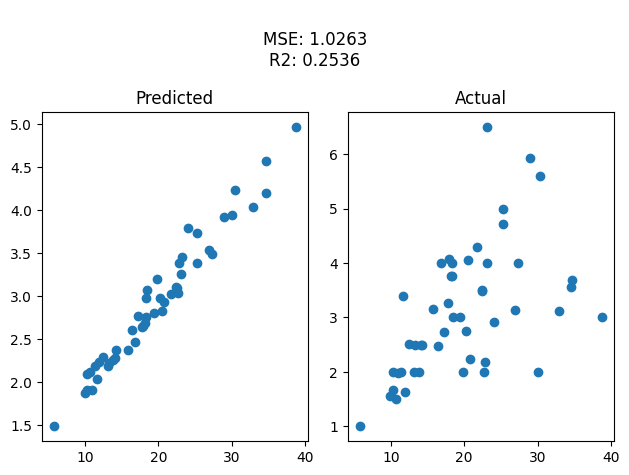

MSE: 1.0263134703831307
MAE: 0.7942588907473634


In [32]:

data = pd.read_csv("./tips_deduplicated.csv")
data = pd.get_dummies(data, columns=["smoker", "sex", "time"])
features = data.drop("tip", axis=1)
features = features.drop("day", axis=1)

target = data["tip"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20) # tuy chinh randomstate
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(X_test.iloc[:, 0], y_pred)  
axes[1].scatter(X_test.iloc[:, 0], y_test)
axes[0].set_title("Predicted")
axes[1].set_title("Actual")
plt.suptitle("{}\nMSE: {}\nR2: {}".format("", round(mse, 4), round(r2, 4)))
plt.tight_layout()
plt.show()

print("MSE:", mse)
print("MAE:", mae)  # In ra MSE

MÔ HÌNH LINEAR REGRESSION

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


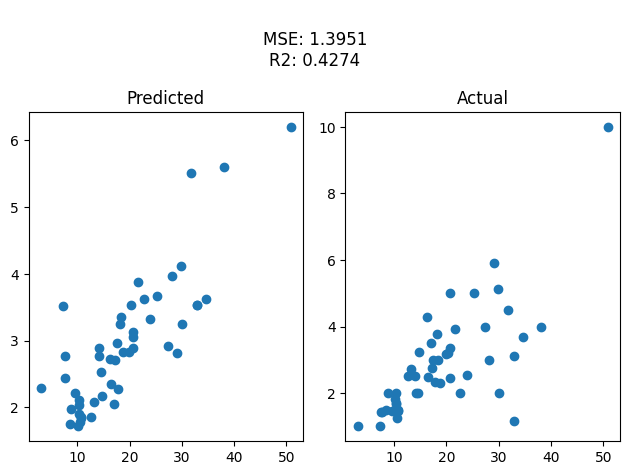

MSE: 1.3951215060982967
MAE: 0.8634662480376766


In [33]:
data = pd.read_csv("./tips_deduplicated.csv")
data = pd.get_dummies(data, columns=[ "smoker", "sex", "time"])
features = data.drop("tip", axis=1)
features = features.drop("day", axis=1)
target = data["tip"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) # tuy chinh gia tri

model = RandomForestRegressor(n_estimators=130, random_state=20)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)  # Tính MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Sửa lại thứ tự tham số

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(X_test.iloc[:, 0], y_pred)  # Sử dụng iloc để truy cập cột đầu tiên
axes[1].scatter(X_test.iloc[:, 0], y_test)
axes[0].set_title("Predicted")
axes[1].set_title("Actual")
plt.suptitle("{}\nMSE: {}\nR2: {}".format("", round(mse, 4), round(r2, 4)))
plt.tight_layout()
plt.show()

print("MSE:", mse)
print("MAE:", mae)  # In ra MSE

MÔ HÌNH RANDOM FOREST

In [34]:
data = pd.read_csv('./tips_deduplicated.csv')  

data = pd.get_dummies(data, columns=[ 'sex', 'smoker', 'time'])
x = data.drop('tip', axis=1)
x = x.drop("day", axis=1)
y = data['tip'] # labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=130, random_state=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

feature_importances = pd.DataFrame({'feature': x.columns, 'importance': model.feature_importances_})
print(feature_importances.sort_values(by='importance', ascending=False))



Mean Squared Error: 1.3869071853640862
R-squared: 0.43077308171469086
       feature  importance
0   total_bill    0.800249
1         size    0.059957
5   smoker_Yes    0.037374
4    smoker_No    0.031079
7   time_Lunch    0.019921
3     sex_Male    0.017406
6  time_Dinner    0.017201
2   sex_Female    0.016813
